In [ ]:
import matplotlib.pyplot as plt; import numpy as np; plt.rcParams['figure.figsize']= [10,5]

#Cubic Interpolation

 This is a continuation of the discussion on piecewise cubic interpolation. Thanks to many students who interacted in and outside the class.

 Clearly, using cubic polynomials between successive samples can help us get a more smooth interpolated waveform than linear interpolation. Here *smooth* is in the sense of being a differentiable analog function in the interval of interest $t \in (t_1,t_n)$ (open, though we can close it as well). Let us consider equi-spaced samples, i.e., $|t_i - t_{i-1}|=T$, for some $T > 0$. You are also free to pad zero values to take care of the edge effects. We will show  that *piecewise cubics* are much more simpler to compute than Lagrange polynomials, albeit less smooth.


---

Let us interpolate between $t_i \leq t \leq t_{i+1}$, with $t_{i+1}= t_i + T$. We are going to label 
\begin{align}
v_0 &:= x(t_i) \\ 
v_1 &:= x(t_{i+1}) .
\end{align}
This is just for notational simplicity. We will construct a polynomial $P_i(t)$ such that $P_i(t_i) = v_0$ and $P_i(t_{i+1}) = v_1$. A cubic polynomial can ensure that the resulting curve is differentiable for $t \in [t_i, t_{i+1}]$. Notice that the use of the closed interval may necessitate some zero padding at the edges. Since the derivative of the waveform at $t=t_i$ may depend on values before $t_i$, let us also denote
the previous and future samples conveniently as
\begin{align}
v_{-1} &:= x(t_{i-1}) \\ 
v_2 &:= x(t_{i+2}) .
\end{align}
Below we list two simplifications to figure out an appropriate $P_i(t)$.
## Idea 1: Translation
Suppose  we  take $t_i=0$ and find an appropriate cubic polynomial $\hat Q(t)$ between $0\leq t \leq T$ with $\hat Q(0) = v_0$ and $\hat Q(T) = v_1$, then we can take $P_i(t) = \hat Q(t-t_i)$ as the required interpolating waveform for the original question, where $t_i$ is starting point we were interested in the original problem. 

##Idea 2: Scaling the argument.
After taking $t_i=0$, suppose we assume $T=1$, and find an appropriate cubic polynomial $Q(t)$ such that $Q(0) = v_0$ and $Q(1) = v_1$. Then we can take $P_i(t) = Q(\frac{t-t_i}T)$ for the original problem, with any finite positive $T$.

---
In short, the ideas of translation and argument-scaling are very convenient, to simplify notation and ease of programming. Usually the argument is time, then we call these operations *time-translation* and *time-scaling*, however they apply for more general arguments. We will find an appropriate $Q(t)$ for each interval of interest, and then do the above manipulations to obtain $P_i(t)$. To proceed further, let us explain how we maintain the differentiability of the piecewise polynomial.






##Differentiability:
 Note that any cubic polynomial $P_i(t)$  is many times differentiable  in the interval $t_i < t < t_{i+1}$. It is only the edges of the interval where we have to ensure a unique derivative, i.e. $P_{i-1}(t)$ and $P_{i}(t)$ should have the same slope at $t=t_i$. Once this is satisfied for all $t_i$ of our interest, then we are happy. While we are free to choose the value of the unique slope we demand at each $t=t_i$, the elegant choice mentioned below gives consistent answers, and is employed widely in practice.
 $$P_i^{\prime}(t_{i}) = \frac{x(t_{i+1}) -  x(t_i)}{2T} = P_{i-1}^{\prime}(t_{i}).
 $$
 Thus we get differentiability at every point within the entire interval of interest. Let us now construct the waveform  for our classroom example, which considered the following set of samples (see figure below). We take $T=2$ as the sample spacing, to illustrate the argument scaling effects.


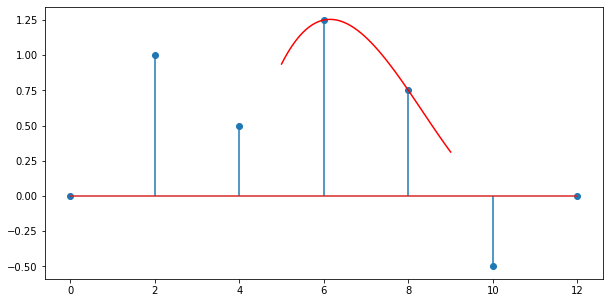

In [ ]:
T = 2;                                        # time interval taken as 2 seconds.
Dy = np.array([0, 1,0.5,1.25,0.75,-0.5, 0]);  # Data points, padded with zeros.
Dx = 2*np.arange(0,len(Dy));                  # time instant t_i = i T, i = 0,1,2,..
plt.stem(Dx, Dy, use_line_collection=True)    # visualize the data

#Let us constuct cubic in the interval [6,8], i.e interval between Dx[3] and Dx[4]. To get this, we need samples Dy[2], Dy[3], Dy[4] and Dy[5].

M = np.array([[-0.5, 1.5, -1.5, 0.5], [1,-2.5,2,-0.5],[-0.5,0,0.5,0],[0,1,0,0]]); # calculations for  a,b,c,d in matrix form.
pcoeff = np.matmul(M,Dy[2:6].T)               # compute the coefficients for Q(t).

t = np.linspace(5,9,50);  # to generate a continuous looking plot in an interval around [6,8], we plot from 5 to 9.
st = t/2.0                # scaled time for Q(t/T) with T=2.
stt = st - 3.0;           # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6. 
plt.plot(t, pcoeff[0]*stt*stt*stt+pcoeff[1]*stt*stt +pcoeff[2]*stt + pcoeff[3],'r');  #can also use np.power(t,m) for t^m, see plot below.

In the above plot, the polynomial $P_3(t)$ is valid for the interval $6 \leq t \leq 8$, and not outside. So the curve should be curtailed to this interval. To give a *better* picture, let us also plot $P_2(t)$, this is given below

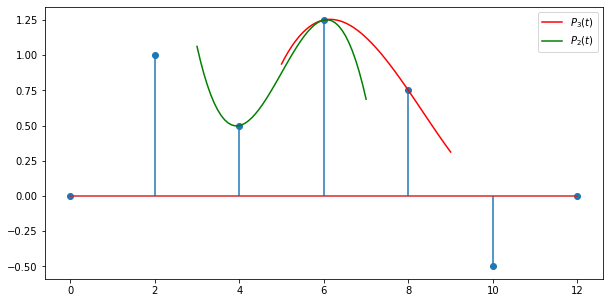

In [ ]:
plt.stem(Dx, Dy, use_line_collection=True)  # previous plot
plt.plot(t, pcoeff[0]*stt*stt*stt+pcoeff[1]*stt*stt +pcoeff[2]*stt + pcoeff[3],'r', label='$P_3(t)$') #previous plot

#Additional Plot
pcoeffn = np.matmul(M,Dy[1:5].T)  #  computes the coefficients for the required Q(t).
tn      = np.linspace(3,7,50);    # to generate a continuous looking plot in an interval around [4,6]
stn     = tn/2.0                  # scaled time for Q(t/T) with T=2.
sttn    = stn - 2.0;              # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6. 
plt.plot(tn, pcoeffn[0]*sttn*sttn*sttn+pcoeffn[1]*sttn*sttn +pcoeffn[2]*sttn + pcoeffn[3],'g', label='$P_2(t)$')
plt.legend(ncol=1)

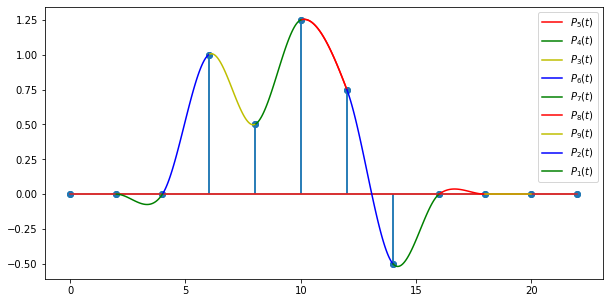

In [ ]:
import matplotlib.pyplot as plt; import numpy as np; plt.rcParams['figure.figsize']= [10,5]
T = 2;                                        # time interval taken as 2 seconds.
Dy = np.array([0,0, 0, 1,0.5,1.25,0.75,-0.5, 0,0,0,0]);  # Data points, padded with zeros.
Dx = 2*np.arange(0,len(Dy));                  # time instant t_i = i T, i = 0,1,2,..
plt.stem(Dx, Dy, use_line_collection=True)    # visualize the data

#Let us constuct cubic in the interval [6,8], i.e interval between Dx[3] and Dx[4]. To get this, we need samples Dy[2], Dy[3], Dy[4] and Dy[5].

M = np.array([[-0.5, 1.5, -1.5, 0.5], [1,-2.5,2,-0.5],[-0.5,0,0.5,0],[0,1,0,0]]); # calculations for  a,b,c,d in matrix form.
pcoeff = np.matmul(M,Dy[4:8].T)               # compute the coefficients for Q(t).

t = np.linspace(10,12,50);  # to generate a continuous looking plot in an interval around [6,8], we plot from 5 to 9.
st = t/2.0                # scaled time for Q(t/T) with T=2.
stt = st - 5.0;           # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6. 
plt.plot(t, pcoeff[0]*stt*stt*stt+pcoeff[1]*stt*stt +pcoeff[2]*stt + pcoeff[3],'r');  #can also use np.power(t,m) for t^m, see plot below.

plt.stem(Dx, Dy, use_line_collection=True)  # previous plot
plt.plot(t, pcoeff[0]*stt*stt*stt+pcoeff[1]*stt*stt +pcoeff[2]*stt + pcoeff[3],'r', label='$P_5(t)$') #previous plot

#Additional Plot
pcoeffn = np.matmul(M,Dy[3:7].T)  #  computes the coefficients for the required Q(t).
tn      = np.linspace(8,10,50);    # to generate a continuous looking plot in an interval around [4,6]
stn     = tn/2.0                  # scaled time for Q(t/T) with T=2.
sttn    = stn - 4.0;              # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6. 
plt.plot(tn, pcoeffn[0]*sttn*sttn*sttn+pcoeffn[1]*sttn*sttn +pcoeffn[2]*sttn + pcoeffn[3],'g', label='$P_4(t)$')
plt.legend(ncol=1)

#Additional Plot
pcoeffn = np.matmul(M,Dy[2:6].T)  #  computes the coefficients for the required Q(t).
tn      = np.linspace(6,8,50);    # to generate a continuous looking plot in an interval around [4,6]
stn     = tn/2.0                  # scaled time for Q(t/T) with T=2.
sttn    = stn - 3.0;              # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6. 
plt.plot(tn, pcoeffn[0]*sttn*sttn*sttn+pcoeffn[1]*sttn*sttn +pcoeffn[2]*sttn + pcoeffn[3],'y', label='$P_3(t)$')
plt.legend(ncol=1)

#Additional Plot
pcoeffn = np.matmul(M,Dy[5:9].T)  #  computes the coefficients for the required Q(t).
tn      = np.linspace(12,14,50);    # to generate a continuous looking plot in an interval around [4,6]
stn     = tn/2.0                  # scaled time for Q(t/T) with T=2.
sttn    = stn - 6.0;              # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6. 
plt.plot(tn, pcoeffn[0]*sttn*sttn*sttn+pcoeffn[1]*sttn*sttn +pcoeffn[2]*sttn + pcoeffn[3],'b', label='$P_6(t)$')
plt.legend(ncol=1)

#Additional Plot
pcoeffn = np.matmul(M,Dy[6:10].T)  #  computes the coefficients for the required Q(t).
tn      = np.linspace(14,16,50);    # to generate a continuous looking plot in an interval around [4,6]
stn     = tn/2.0                  # scaled time for Q(t/T) with T=2.
sttn    = stn - 7.0;              # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6. 
plt.plot(tn, pcoeffn[0]*sttn*sttn*sttn+pcoeffn[1]*sttn*sttn +pcoeffn[2]*sttn + pcoeffn[3],'g', label='$P_7(t)$')
plt.legend(ncol=1)

#Additional Plot
pcoeffn = np.matmul(M,Dy[7:11].T)  #  computes the coefficients for the required Q(t).
tn      = np.linspace(16,18,50);    # to generate a continuous looking plot in an interval around [4,6]
stn     = tn/2.0                  # scaled time for Q(t/T) with T=2.
sttn    = stn - 8.0;              # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6. 
plt.plot(tn, pcoeffn[0]*sttn*sttn*sttn+pcoeffn[1]*sttn*sttn +pcoeffn[2]*sttn + pcoeffn[3],'r', label='$P_8(t)$')
plt.legend(ncol=1)

#Additional Plot
pcoeffn = np.matmul(M,Dy[8:12].T)  #  computes the coefficients for the required Q(t).
tn      = np.linspace(18,20,50);    # to generate a continuous looking plot in an interval around [4,6]
stn     = tn/2.0                  # scaled time for Q(t/T) with T=2.
sttn    = stn - 9.0;              # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6. 
plt.plot(tn, pcoeffn[0]*sttn*sttn*sttn+pcoeffn[1]*sttn*sttn +pcoeffn[2]*sttn + pcoeffn[3],'y', label='$P_9(t)$')
plt.legend(ncol=1)

#Additional Plot
pcoeffn = np.matmul(M,Dy[1:5].T)  #  computes the coefficients for the required Q(t).
tn      = np.linspace(4,6,50);    # to generate a continuous looking plot in an interval around [4,6]
stn     = tn/2.0                  # scaled time for Q(t/T) with T=2.
sttn    = stn - 2.0;              # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6. 
plt.plot(tn, pcoeffn[0]*sttn*sttn*sttn+pcoeffn[1]*sttn*sttn +pcoeffn[2]*sttn + pcoeffn[3],'b', label='$P_2(t)$')
plt.legend(ncol=1)

#Additional Plot
pcoeffn = np.matmul(M,Dy[0:4].T)  #  computes the coefficients for the required Q(t).
tn      = np.linspace(2,4,50);    # to generate a continuous looking plot in an interval around [4,6]
stn     = tn/2.0                  # scaled time for Q(t/T) with T=2.
sttn    = stn - 1.0;              # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6. 
plt.plot(tn, pcoeffn[0]*sttn*sttn*sttn+pcoeffn[1]*sttn*sttn +pcoeffn[2]*sttn + pcoeffn[3],'g', label='$P_1(t)$')
plt.legend(ncol=1)

Notice that both $P_2(t)$ and $P_3(t)$ have the same slope at $t=6$. So the interpolating waveform, taken in a piecewise manner as $P_2(t)$ in $4 \leq t \leq 6$ and $P_3(t)$ for $6\leq t \leq 8$, will agree not only on the value it takes at $t=6$, but also has a unique slope defined at each $t$ in $4 < t < 8$. Remember that we are not as such superposing the polynomials, we only pick them piecewise for non-overlapping intervals.

#Homework-2.1: 
  Complete the cubic interpolation for the samples given above, and make a plot of just the interpolating function (i.e. remove the extra ribbons). However, be careful, you may need to add more zeros to get the full picture. You can email your answer in png format. However, all  answers for Homework-2.x should reach as a single email. So wait till I announce all Homework-2 series questions (in class).

# A More Practical Example

This takes into account a question raised in the class about the practical suitability of linear interpolation, and also other such interpolators.

---
**Question**: A set of samples $x[n] = \sin(2 \pi 1000 n T_s)$ are given to you for $n = 0,1,2,\ldots$. Suppose $T_s = \frac 1{8 \times 10^3}$. How will you produce a 1 kHz  audible sine-wave output using these samples in your computer, which is assumed to have an audio card running at $f_{clk} = 48 \times 10^3$ Hz. 

#Answer:
 Let us first have a detailed look at these samples. Which possible continuous time waveform can we obtain by interpolating the given sequence of values. A natural guess is that the samples might have come from the function $x(t) = \sin(2 \pi 1000 t)$, which is an 1 kHz audible sine wave. Notice here that $t$ is measured in seconds. Of course there are many other possible choices for $x(t)$, for example by linear interpolation or cubic interpolation of the samples. Let us plot the samples and see.

<StemContainer object of 3 artists>

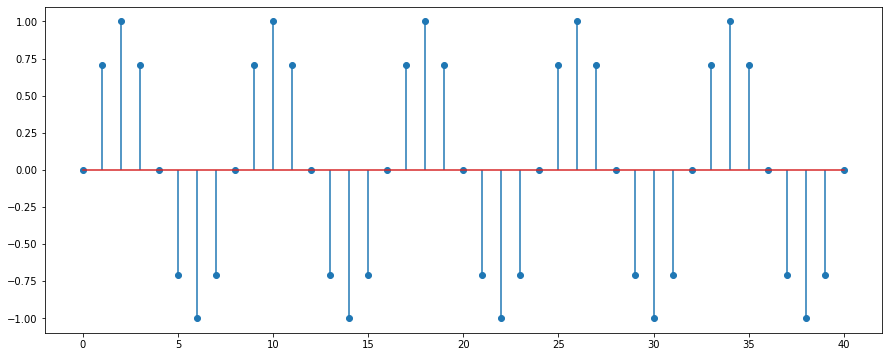

In [ ]:
plt.rcParams['figure.figsize']= [15,6]

N = 41 # number of samples
pt = np.arange(0,N);
plt.stem(pt, np.sin(2*np.pi*1000*pt/(8000)), use_line_collection=True)

Linear Interpolator Output Waveform for the above question is shown below. Notice the kinks in the curve, leading to a visible lack of smoothness.
 Notice that the wave does one cyclic excursion in $8$ samples. As we mentioned, the usual plots connect successive samples with a line, and this gives a visualization/illusion of a analog waveform, see below. 
 

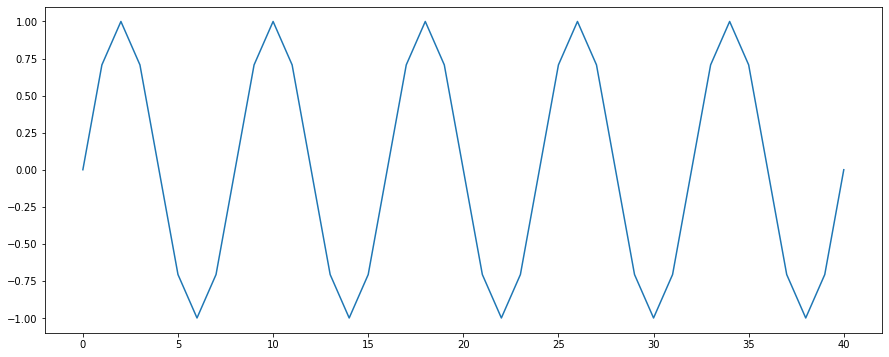

In [ ]:
plt.plot(pt, np.sin(2*np.pi*1000*pt/(8000)))

## Resampling
We can wake up from the illusion and ask how well the underlying discrete-time waveform play out on a audio device? Note the audio device is reading $48\times 10^3$ samples a second, that is why it has a rating of $48$kHz. So $48$ samples are read in each millisecond. 
<br>

If the cycles have to *span* $1$ millisecond, we need $48$ samples per cycle, whereas the input only has $8$ samples per cycle. So we need to convert the $8$ samples to $48$, i.e. $6$ times more samples. This factor of additional samples is known as the **interpolation factor**, and idea of obtaining a different set of samples from the given one is known as **resampling**. While the plot below makes you visualize resampling by a factor of $6$ (i.e. from 8 to 48) using a linear intepolator, these things are best illustrated in at tool called GNURADIO.
 

<StemContainer object of 3 artists>

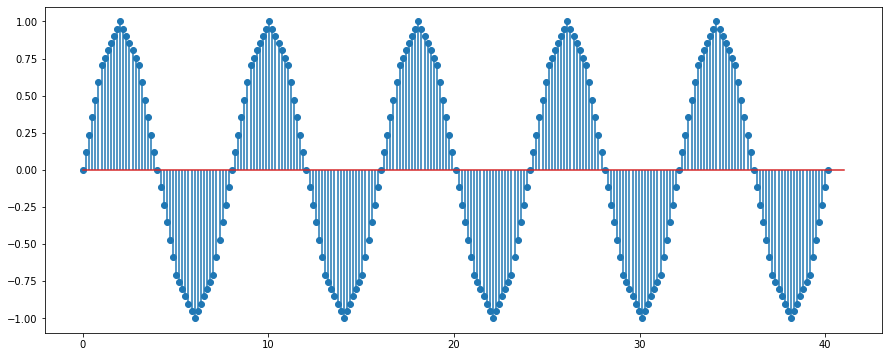

In [ ]:
xt = np.sin(2*np.pi*1000*pt/(8000))
#Create more points.
IA = np.zeros((6,N))  #array to store 6 times interpolated values.
IA[0,:] = xt          # first row with the given values.
for k in range(1,6):
  for i in range(0,N-1):
    IA[k,i] = xt[i]*(1-k/6) + xt[i+1]*(k/6)
  IA[k,N-1] = np.NaN; # to avoid edge effects, last few values not plotted.
IB = IA.T.reshape(6*N,1);
#plt.plot(IB)
plt.stem(np.linspace(0,41, 6*N), IB, use_line_collection=True)
